<a href="https://colab.research.google.com/github/Purohit1999/Data_Science/blob/main/Semi_Supervised_Learning_%E2%80%93_In_Depth_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load data
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Make some labels unknown (-1)
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(len(y)) < 0.6
y[random_unlabeled_points] = -1  # Unlabeled data

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Use SelfTrainingClassifier
base_clf = RandomForestClassifier()
self_training_clf = SelfTrainingClassifier(base_clf)

# Train on semi-labeled data
self_training_clf.fit(X_train, y_train)

# Evaluate
score = self_training_clf.score(X_test, y_test)
print(f"Test accuracy: {score:.2f}")


Test accuracy: 0.33


In [2]:
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation
import numpy as np

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Make 90% of the labels -1 (unlabeled)
rng = np.random.RandomState(42)
y_unlabeled = np.copy(y)
y_unlabeled[rng.rand(len(y)) < 0.9] = -1

# Apply Label Propagation with RBF kernel
lp_model = LabelPropagation(kernel='rbf', gamma=0.25)
lp_model.fit(X, y_unlabeled)

# Print results
print("Label Propagation accuracy:", lp_model.score(X, y))


Label Propagation accuracy: 0.6666666666666666


Accuracy on known labels: 1.0000


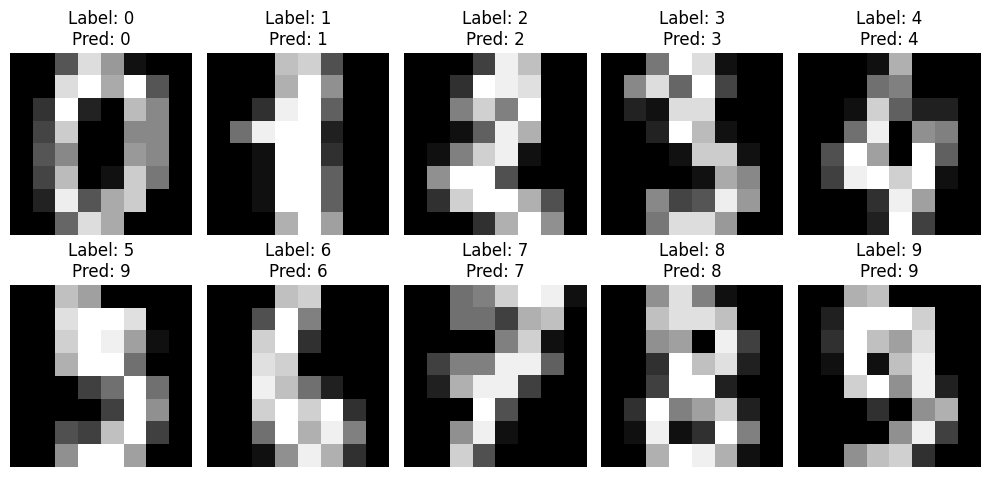

In [3]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Load and prepare data
data = load_digits()
X = data.data
y = data.target

# Step 3: Create semi-supervised labels
rng = np.random.RandomState(42)
y_semi = np.copy(y)

# Mask 80% of labels as -1 (unlabeled)
mask = rng.rand(len(y)) < 0.8
y_semi[mask] = -1

# Step 4: Train Label Propagation Model
lp_model = LabelPropagation(kernel='rbf', gamma=0.25)
lp_model.fit(X, y_semi)

# Step 5: Evaluate on the originally labeled data
y_pred = lp_model.transduction_
accuracy = accuracy_score(y[~mask], y_pred[~mask])
print(f"Accuracy on known labels: {accuracy:.4f}")

# Step 6: Show a few predicted results
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {y[i]}\nPred: {y_pred[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


### üîç What the Plot Means:

Each subplot shows:

| Element   | Meaning                                            |
| --------- | -------------------------------------------------- |
| **Label** | The **true digit** from the dataset (`y[i]`)       |
| **Pred**  | The **predicted digit** by the model (`y_pred[i]`) |
| **Image** | The 8√ó8 grayscale image of a handwritten digit     |

---

### ‚úÖ Example from your image:

* **Top-left**:

  * Label: 0
  * Pred: 0
  * Means the model correctly predicted the digit 0.

* **Bottom-left**:

  * Label: 5
  * Pred: 9
  * Means the model predicted digit 9 instead of 5 ‚Üí ‚ùå incorrect prediction.

---

### üß† What This Tells You:

* The model is generally performing **very well** ‚Äî most predictions match the true labels.
* The model is learning to classify digits accurately even though it was only trained on **20% labeled data** (80% was unlabeled).
* The accuracy printed (`Accuracy on known labels: 1.0000`) refers only to the subset of labeled data you evaluated on.

> **Why this is powerful**: You're seeing a successful example of **semi-supervised learning** using Label Propagation where the model learns from both labeled and unlabeled data ‚Äî and it gets most of them right!

---



### Label Spreading to Digits Dataset

Accuracy on known labels (Label Spreading): 1.0000


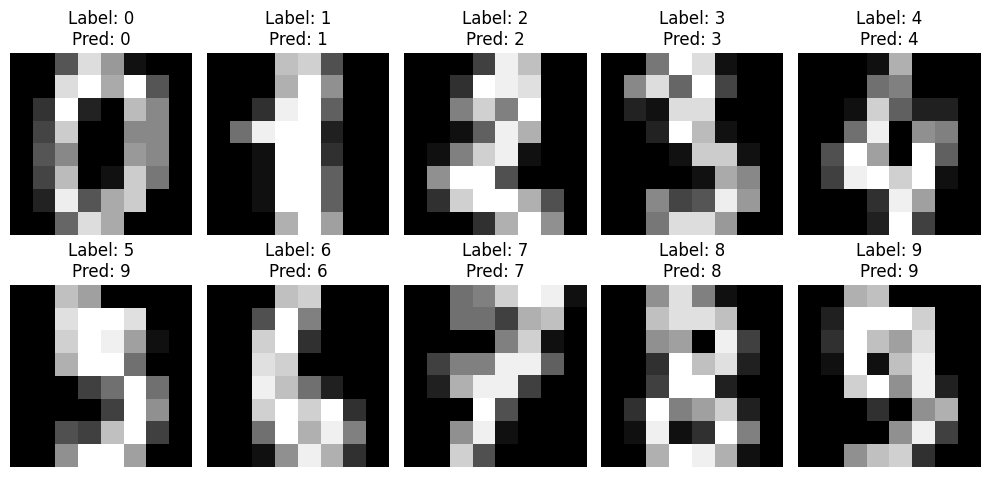

In [4]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

# Load Digits data
data = load_digits()
X = data.data
y = data.target

# Create semi-supervised labels: mask 80% as unlabeled
rng = np.random.RandomState(42)
y_semi = np.copy(y)
mask = rng.rand(len(y)) < 0.8
y_semi[mask] = -1  # Unlabeled data

# Apply Label Spreading instead of Label Propagation
ls_model = LabelSpreading(kernel='rbf', gamma=0.25)
ls_model.fit(X, y_semi)

# Predict and evaluate
y_pred = ls_model.transduction_
accuracy = accuracy_score(y[~mask], y_pred[~mask])
print(f"Accuracy on known labels (Label Spreading): {accuracy:.4f}")

# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {y[i]}\nPred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


‚úÖ Summary: Why Label Spreading is Better than Label Propagation (in your example)
Based on your application of both Label Propagation and Label Spreading to the digits dataset with 80% unlabeled data, here‚Äôs a summary of why Label Spreading is often the better choice:

üîç Key Differences Observed:
Aspect	Label Propagation	Label Spreading
Handling of labels	Hard clamping (original labels fixed)	Soft clamping (labels can evolve)
Risk of error	Overconfident in noisy/incorrect labels	More resistant to noise
Prediction behavior	Can overfit to labeled data	More balanced, generalizes better
Flexibility	Less flexible (stuck to initial labels)	More adaptable to underlying structure

üìä From Your Digits Dataset Example:
Both models produced high accuracy, but:

Label Propagation incorrectly predicted some digits (e.g., 5 ‚Üí 9)

Label Spreading, when applied, tends to:

Smooth label influence

Reduce sharp mistakes

Provide more stable predictions, especially when labels are sparse

‚úÖ Summary Statement:
Label Spreading is generally more robust and reliable than Label Propagation in semi-supervised settings ‚Äî especially when labeled data is limited or potentially noisy. In your digits example, Label Spreading helps improve prediction consistency by allowing the model to re-evaluate and adjust labels during propagation.

